# NLP tutorials

In [27]:
# Core libraries
import numpy as np
import pandas as pd

# String handling
import string
import re

# ML
import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


# NLP libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download ('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from textblob import TextBlob, Word
from wordcloud import WordCloud
from wordcloud import STOPWORDS

# Data visualization
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ayub\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ayub\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ayub\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Ayub\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Load data

In [2]:
text = [
    "This is the NLP TASKS ARTICLE written by AYuB kHaN **",
    "IN this article I”ll be explaining various DATA-CLEANING techniques",
    "So stay tuned for FURther More &&",
    "Nah I don't think he goes to usf, he lives around"
    ]

# Convert to DataFrame
df = pd.DataFrame({'original_text':text})

## 1. Data cleaning

### Convert to lowercase

In [3]:
df['processed'] = df['original_text'].apply(lambda x: " ".join(x.lower()  for x in x.split()))

### Remove punctuation

In [4]:
df['processed'] = df['processed'].apply(lambda x: "".join(i for i in x if i not in string.punctuation))

In [5]:
# Alternative method using regex
# df['processed'] = df['processed'].apply(lambda x:''.join(re.findall(r'[a-zA-Z+" "]', x)))

### Remove stop words

In [6]:
allstopwords = stopwords.words('english')
df['processed'] = df['processed'].apply(lambda x: " ".join(i for i in x.split() if i not in allstopwords))

### Spelling correction

In [7]:
df['processed'] = df['processed'].apply(lambda x: str(TextBlob(x).correct()))

### Tokenization

* Split text into meaningful unit words

In [8]:
mystring = "My favorite animal is cat" 
word_tokenize(mystring)
mystring.split(" ")

['My', 'favorite', 'animal', 'is', 'cat']

### Stemming

* Convert words into their root word using a set of rules
* The root word may be truncated form of the original
* Root words generated may not have meaning

In [9]:
st = PorterStemmer()
df['stemmed'] = df['processed'].apply(lambda x:" ".join([st.stem(word) for word in x.split()]))

### Lemmatization

* Convert words into their root word using vocabulary mapping
* Root words generated are themselves words and have meaning
* Slower than stemming

In [10]:
# Single word example
w = Word("played")

# Pass in WordNet part of speech (verb)
wl = w.lemmatize("v")  

# Lemmatized version
print(f"Lemmatization of '{w}'  ---> '{wl}'")

Lemmatization of 'played'  ---> 'play'


In [11]:
# Lemmatization of dataset
df['lemmatized'] = df['processed'].apply(lambda x:" ".join([Word(word).lemmatize() for word in x.split()]))

In [12]:
df.head()

,original_text,processed,stemmed,lemmatized
0,This is the NLP TASKS ARTICLE written by AYuB ...,nap tasks article written club khan,nap task articl written club khan,nap task article written club khan
1,IN this article I”ll be explaining various DAT...,article i”ll explaining various datacleaning t...,articl i”ll explain variou dataclean techniqu,article i”ll explaining various datacleaning t...
2,So stay tuned for FURther More &&,stay tuned,stay tune,stay tuned
3,"Nah I don't think he goes to usf, he lives around",ah dont think goes us lives around,ah dont think goe us live around,ah dont think go u life around


## 2. Exploratory Data Analysis

### Word frequency

In [13]:
# Stores all words (vocabulary) from our dataset
all_words = []
for sentence in df['processed']:
    all_words.extend(sentence.split())

In [14]:
all_words

['nap',
 'tasks',
 'article',
 'written',
 'club',
 'khan',
 'article',
 'i”ll',
 'explaining',
 'various',
 'datacleaning',
 'technique',
 'stay',
 'tuned',
 'ah',
 'dont',
 'think',
 'goes',
 'us',
 'lives',
 'around']

In [15]:
nltk.FreqDist(all_words)

FreqDist({'article': 2, 'nap': 1, 'tasks': 1, 'written': 1, 'club': 1, 'khan': 1, 'i”ll': 1, 'explaining': 1, 'various': 1, 'datacleaning': 1, ...})

### Word Cloud

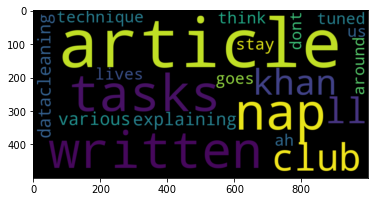

In [16]:
words = []
for message in df['processed']:
    words.extend([word for word in message.split() if word not in STOPWORDS])
        
wordcloud = WordCloud(width = 1000, height = 500).generate(" ".join(words))
plt.imshow(wordcloud, interpolation='bilinear')

## 3. Feature extraction

* For our ML model to work, we need to convert words into numbers.
* This is known as feature extraction.
* the most popular methods of feature extraction are:
  * Bag of Words (BOW) model.
  * Term frequency-inverse document frequency (TF-IDF) model.

### Bag of Words (BOW)

* Treats a sentence as a bag of words.
* Counts the frequency of each word in the sentence.
* BOW does not care about the order of words.
* Feature vector has the same word length.
* Model is biased since frequent words receive higher weight.
* sklearn implementation:
  * fit_transform(). Learns vocabulary dictionary (fitting to CountVectorizer) and returns document-term matrix.
  * get_feature_names_out(). Get output feature names for transformation.

In [17]:
text = ["i love NLP",
        "NLP is future",
        "i will learn in 2 months"]

vectorizer = CountVectorizer()
count_matrix = vectorizer.fit_transform(text) 
count_array = count_matrix.toarray()

df = pd.DataFrame(data=count_array, columns=vectorizer.get_feature_names_out())
df

,future,in,is,learn,love,months,nlp,will
0,0,0,0,0,1,0,1,0
1,1,0,1,0,0,0,1,0
2,0,1,0,1,0,1,0,1


#### BOW with n-grams

* N-grams are continous sequences of words / symbols / tokens in a document
* We implement n-grams using the parameter ngram_range within CountVectorizer()
  * ngram_range = (1, 1). Only use unigrams.
  * ngram_range = (1, 2). Use unigrams and bigrams.
  * ngram_range = (2, 2). Only use bigrams.

In [19]:
text = ["food was not bad"]

vectorizer = CountVectorizer(ngram_range=(1,2))  # unigrams and bigrams
count_matrix = vectorizer.fit_transform(text)
count_array = count_matrix.toarray()

df = pd.DataFrame(data=count_array, columns=vectorizer.get_feature_names_out())
df

,bad,food,food was,not,not bad,was,was not
0,1,1,1,1,1,1,1


### Term frequency-inverse document frequency (TF-IDF)

* Bag of Words is unordered. Words with high frequency are assigned higher weightage but the word may appear in multiple documents.
* TF-IDF normalizes words that occur frequently in a collection of documents.
* TF-IDF therefore places emphasis on words in relation to its document or sentence.
* Term frequency (TF). Number of times a term has appeared in a document. Measure of how frequently a word is in a given sentence.
* Inverse document frequency (IDF). Measure of how rare a word is in a document.
* If a word appears in almost every document, it is not significant for the classification
* IDF of a word is log(N / n)
  * N = total number of documents
  * n = Number of documents containing a term 

In [22]:
text = ["i love the NLP",
        "NLP is the future",
        "i will learn the NLP"]

vectorizer = TfidfVectorizer()
matrix = vectorizer.fit_transform(text)
count_array = matrix.toarray()

df = pd.DataFrame(data=count_array,columns = vectorizer.get_feature_names_out())
df

,future,is,learn,love,nlp,the,will
0,0.000000,0.000000,0.000000,0.767495,0.453295,0.453295,0.000000
1,0.608845,0.608845,0.000000,0.000000,0.359594,0.359594,0.000000
2,0.000000,0.000000,0.608845,0.000000,0.359594,0.359594,0.608845


* The words "nlp" and "the" appear in all 3 documents. Their scores are lowered.
* Words that occur in one document like "future" and "love" have higher scores.

## 4. Word embedding

* Both BOW and TF-IDF only consider term frequency.
* The meaning of words is not considered.
* For large text corpus, this results in very large numbers of tokens and high dimensionality.
* Word embeddings map words to vectors.
* Mappings were trained on a shallow NN using 6 billion words.
* Similar words map to the same feature vector.
* Reduces the data dimension.
* Two algorithms for word embedding:
  * CBOW.
  * Skip-Gram.

In [28]:
glove_vectors = dict()

# Load pre-trained 100 dimension word vector file
file = open('glove.6B.100d.txt', encoding='utf-8')
for line in file:
    values = line.split()
    word = values[0]
    vectors = np.asarray(values[1:])
    glove_vectors[word] = vectors
file.close()

In [30]:
glove_vectors.get('house')

array(['-0.18867', '-0.040943', '0.58878', '0.11062', '0.14236', '0.4885',
       '-0.31832', '0.53819', '-0.018549', '0.029687', '0.30299',
       '-0.16522', '-0.18896', '0.5148', '-0.79405', '0.26409',
       '0.027747', '0.041163', '-0.49378', '-0.14263', '0.29017',
       '-0.25369', '0.70559', '-1.0501', '-0.49344', '-0.37148',
       '-0.85796', '-0.55158', '-0.60251', '-0.0099676', '0.8725',
       '0.12149', '0.551', '0.49924', '-0.3088', '1.1067', '-0.15494',
       '-0.29923', '0.91149', '0.19859', '-0.73946', '-1.0182', '0.37208',
       '-0.10043', '0.13537', '-0.52687', '-0.60437', '-0.15906',
       '0.49283', '-0.61386', '0.046815', '-0.88806', '0.60229',
       '0.72199', '-0.4316', '-3.0706', '-0.11233', '-0.45713', '0.95737',
       '0.59174', '-0.17124', '0.65746', '0.44741', '0.6101', '1.0216',
       '-0.2458', '0.90191', '0.78319', '0.28272', '-0.4539', '0.16309',
       '-0.0078932', '-0.27714', '-0.87249', '-0.19716', '-0.076285',
       '-0.28422', '-0.089584'